In [9]:
import pandas as pd
import numpy as np

In [10]:
# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [13]:
# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix



In [14]:
df = pd.read_csv("C:/Saifali/SDP/DDOS/DDOS/data/data.csv")


In [15]:

df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [16]:
df.drop([],axis=1)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,DDoS
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
66235,80,78336816,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,22026.0,0.0,22026.0,22026.0,78300000.0,0.0,78300000.0,78300000.0,DDoS


In [17]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [18]:
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

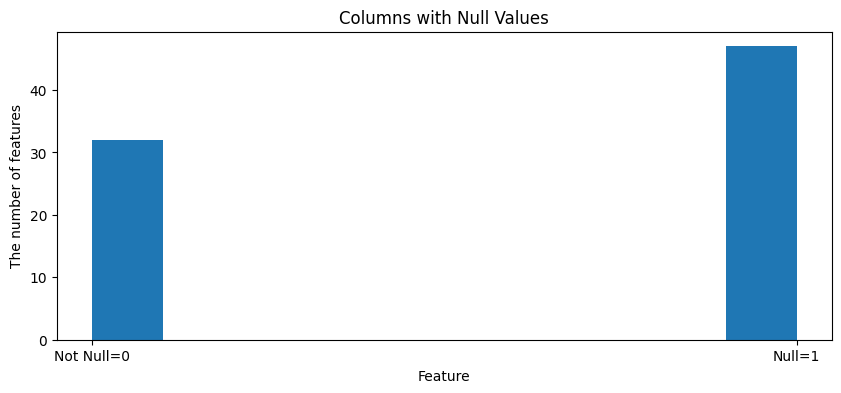

In [19]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()

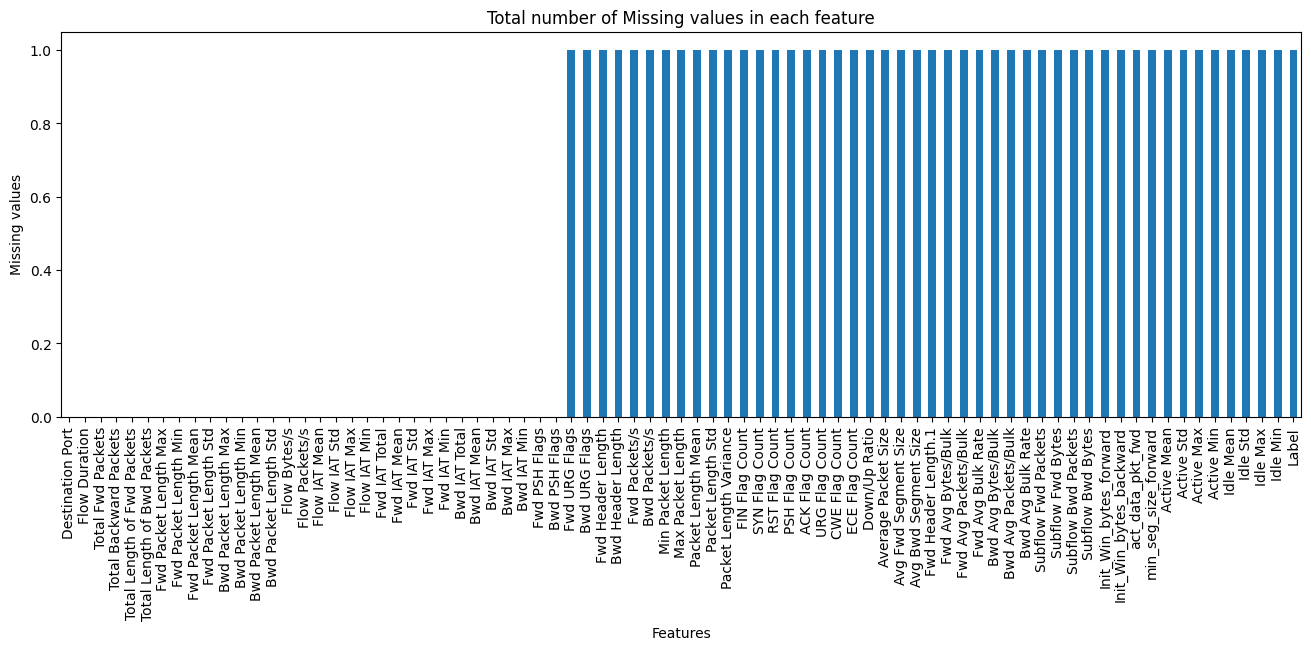

In [20]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [21]:

## Removing the null values
data_f=df.dropna()

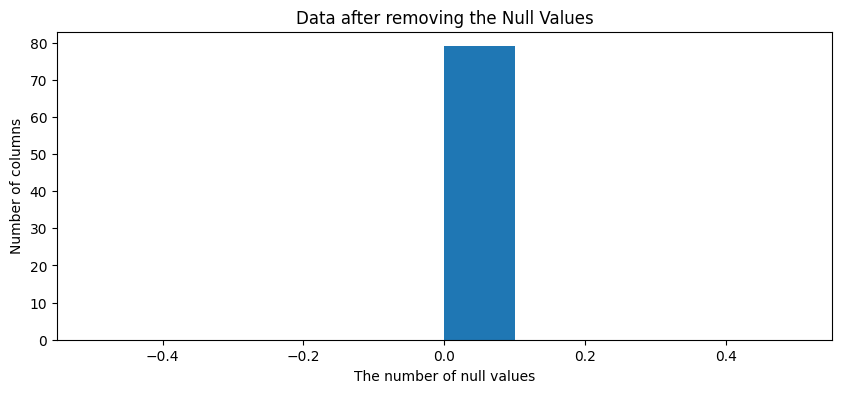

In [22]:

#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data after removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

In [23]:
# Replace infinite values with NaN and reassign
data_f = data_f.replace([np.inf, -np.inf], np.nan)

# Check for NaN values
null_values = data_f.isnull().sum()
print(null_values)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


In [24]:

# To know the data types of the columns

(data_f.dtypes)


Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Label                           object
Length: 79, dtype: object

In [25]:

# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

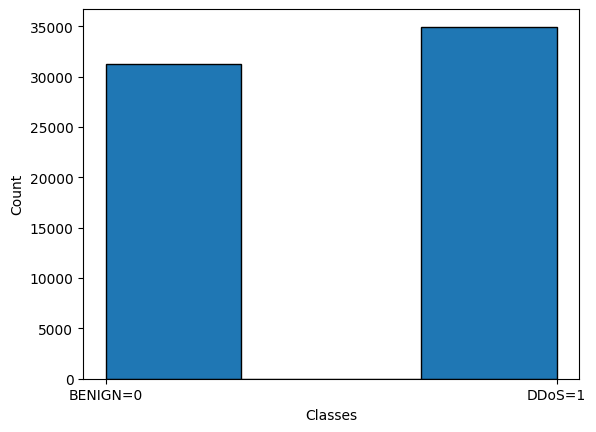

In [26]:

# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [27]:

df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


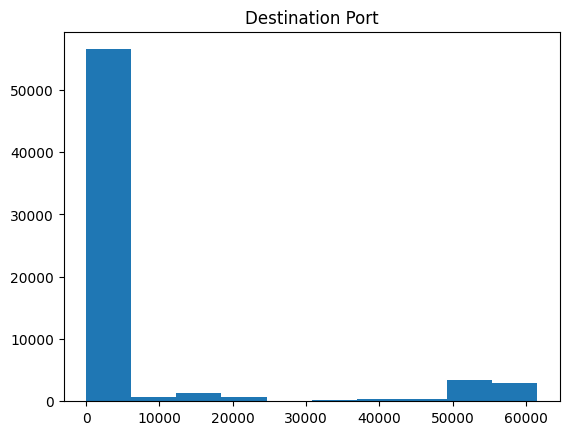

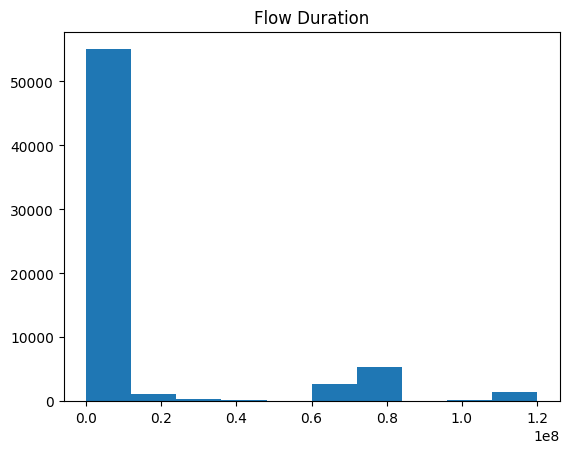

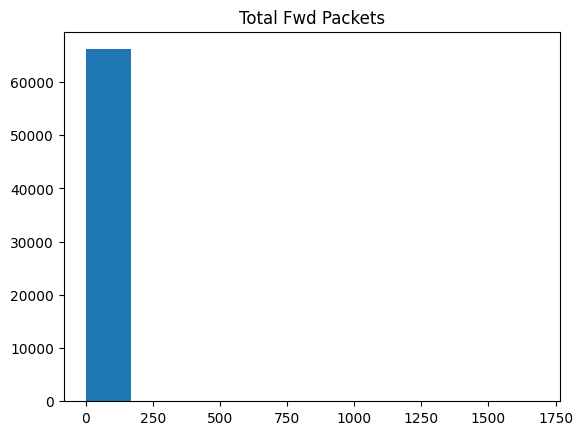

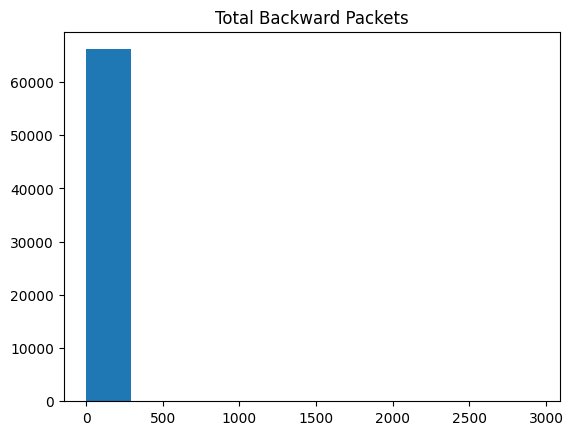

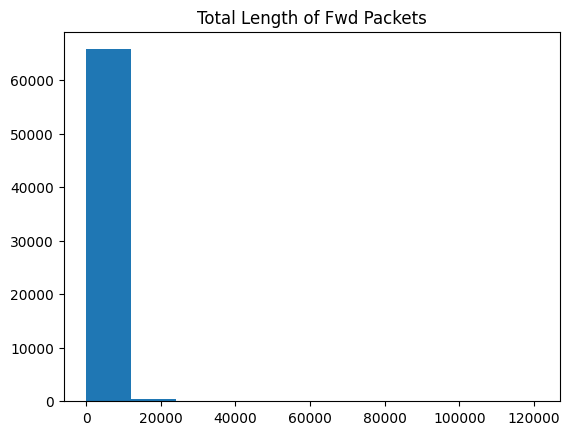

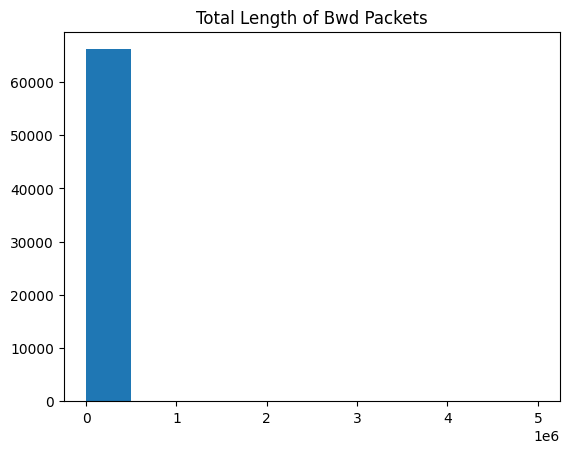

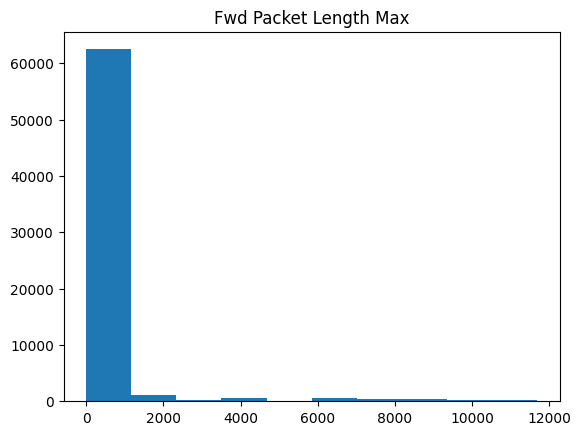

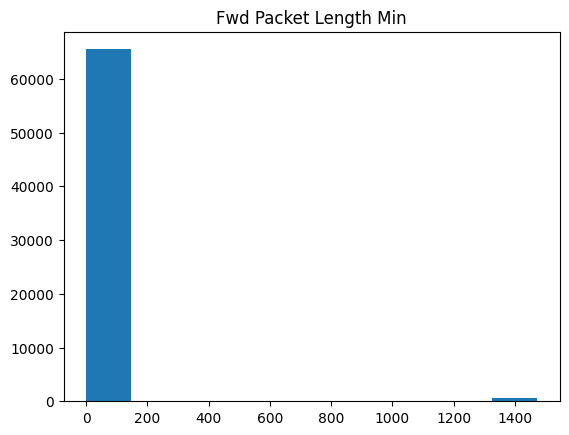

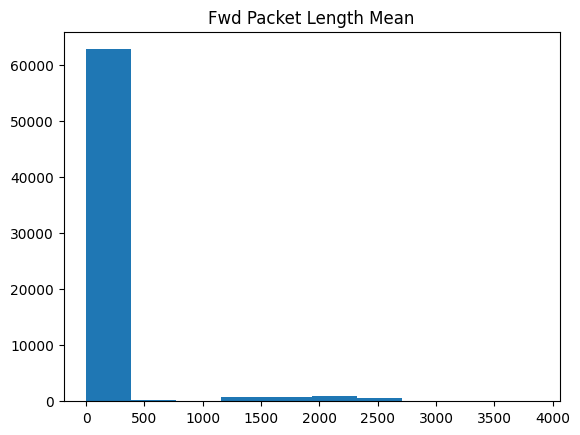

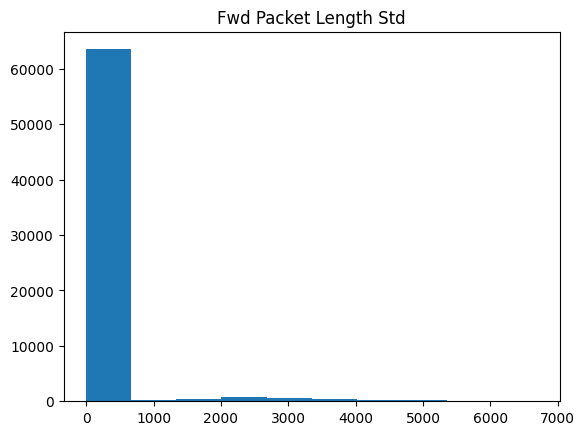

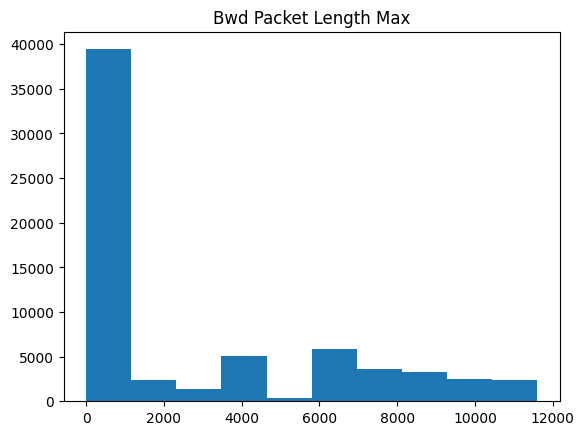

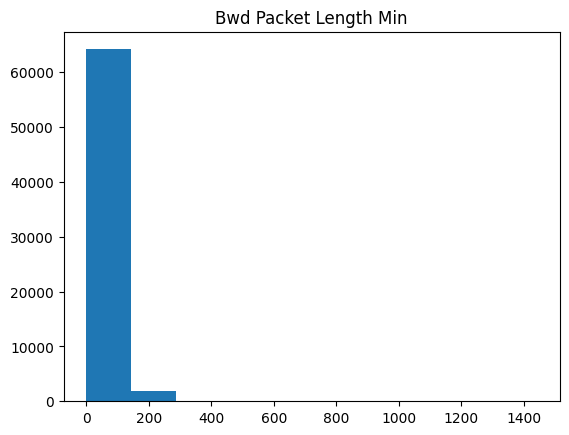

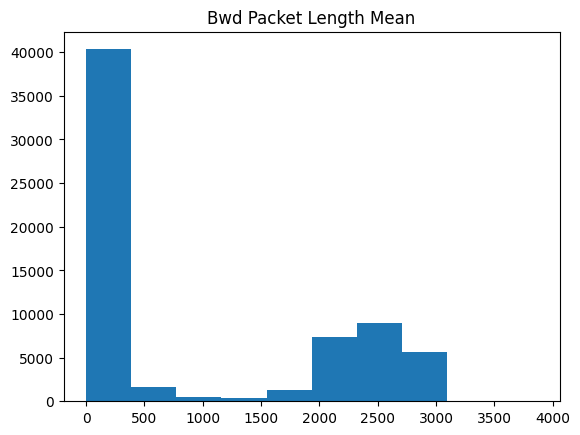

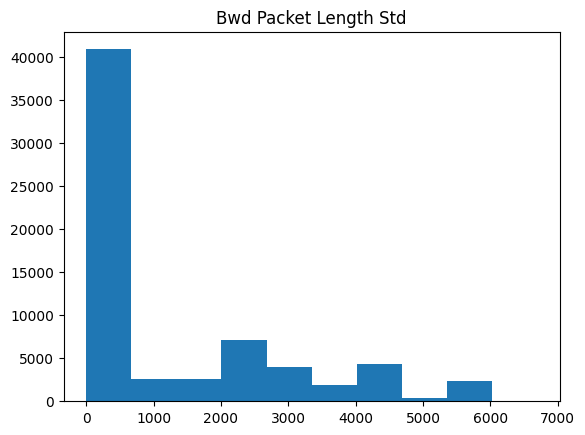

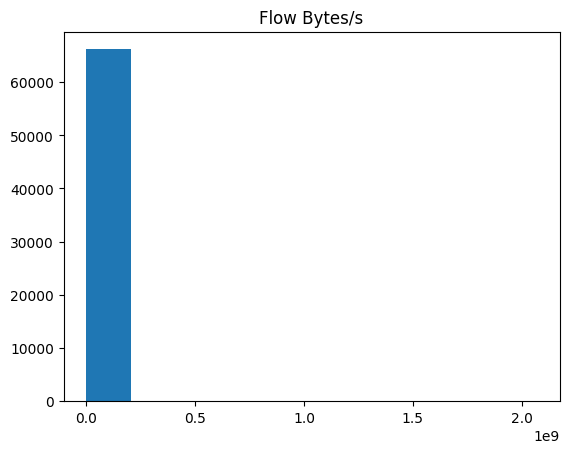

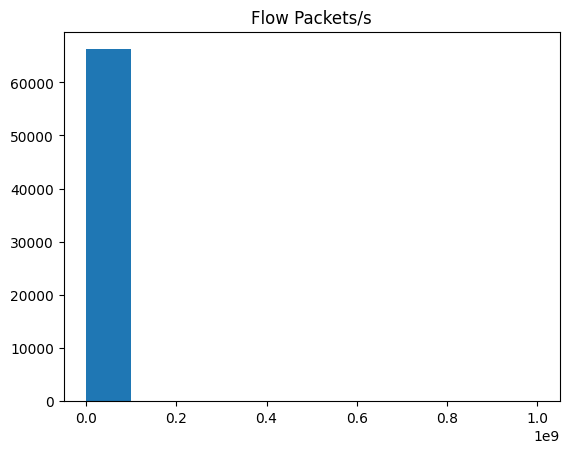

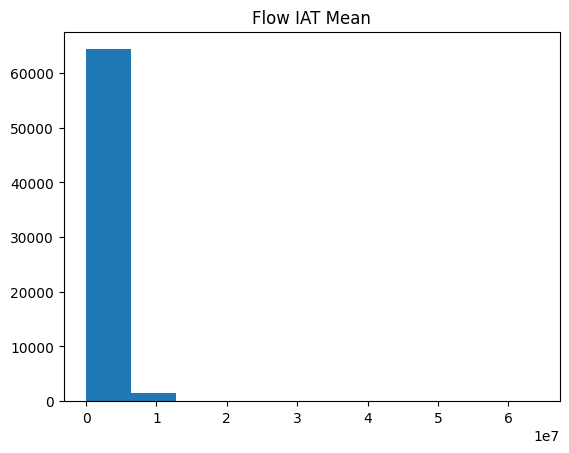

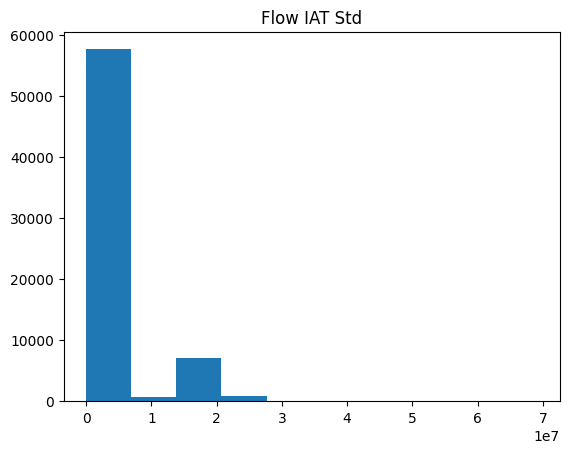

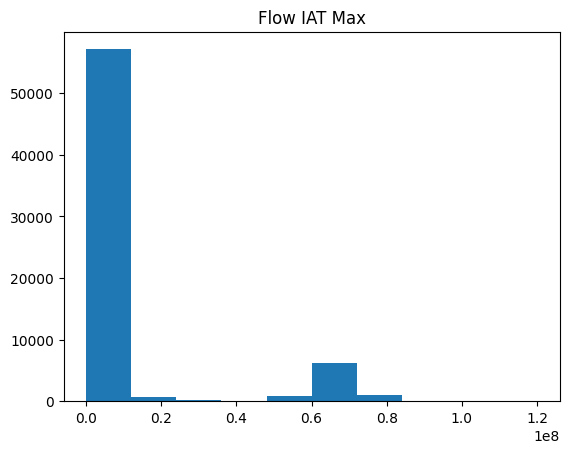

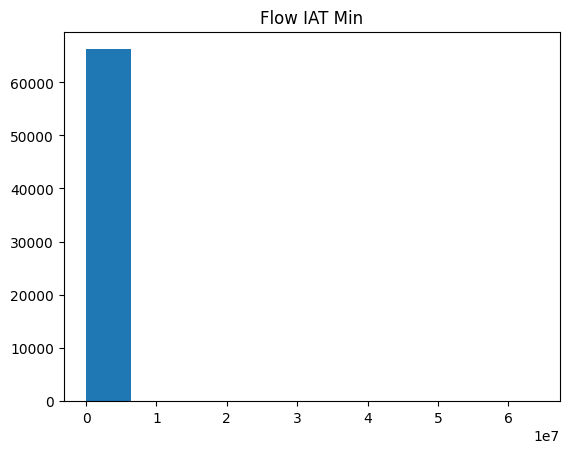

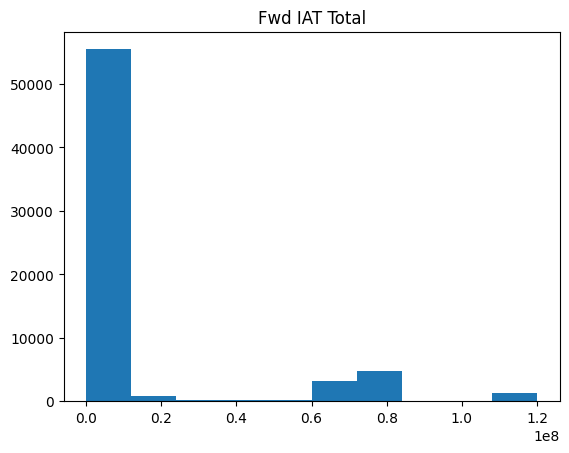

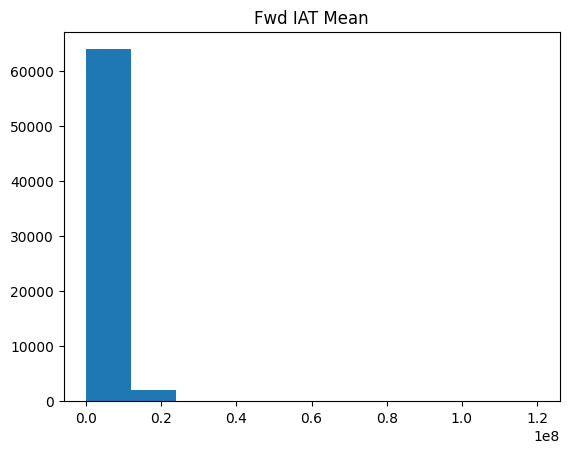

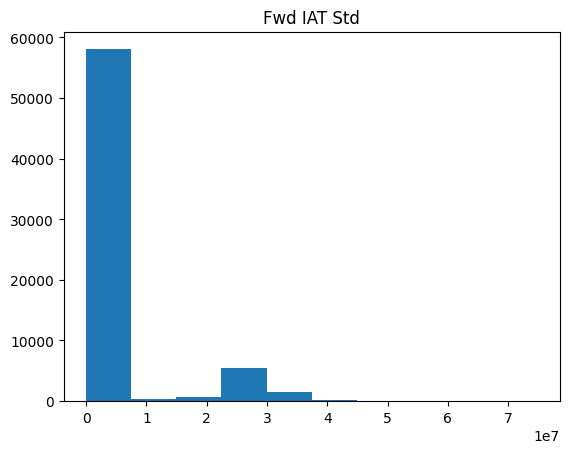

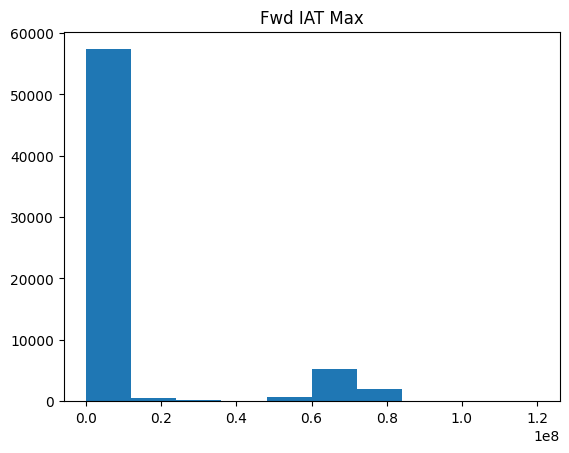

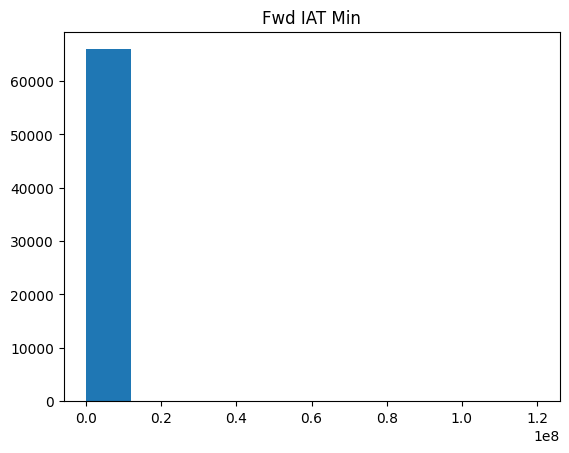

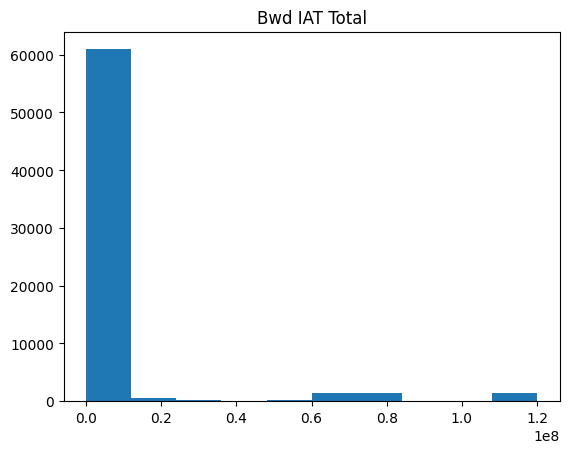

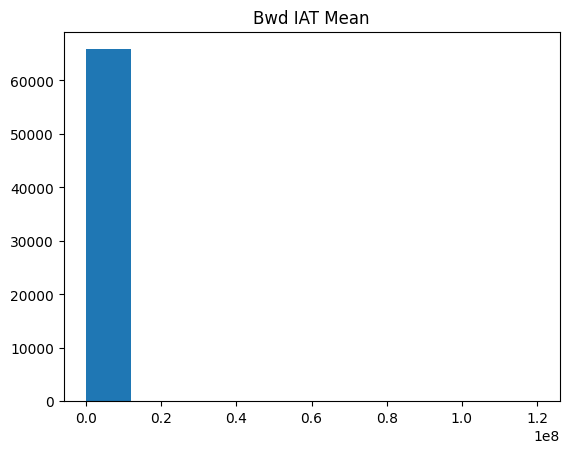

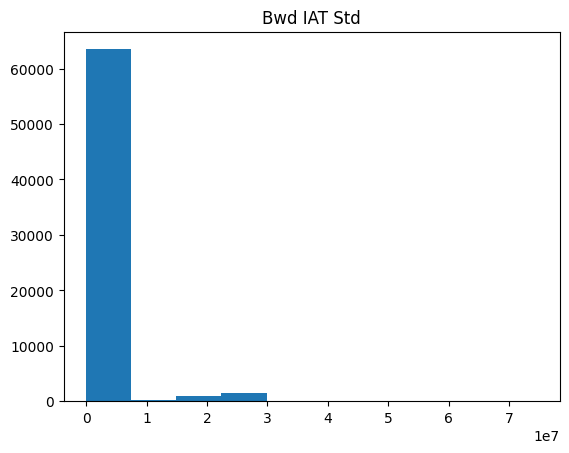

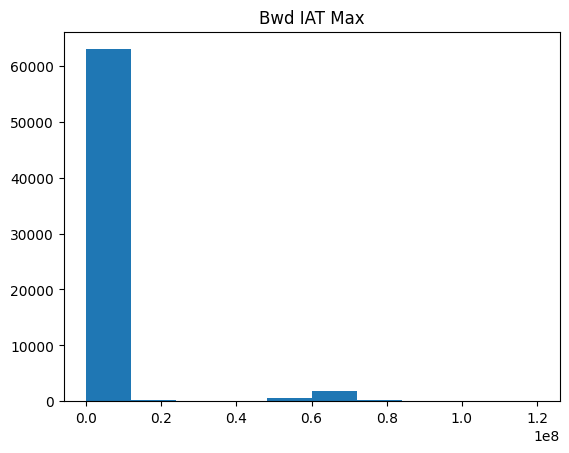

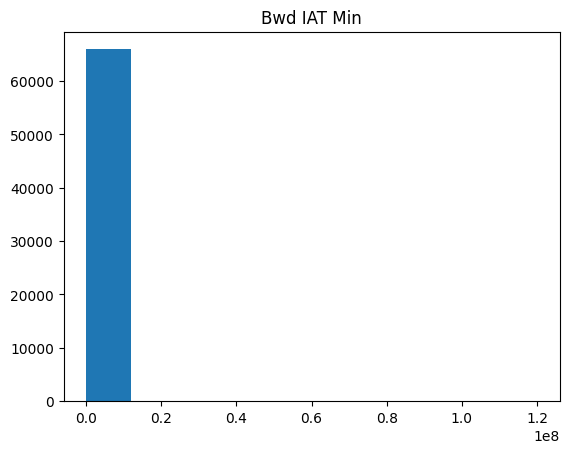

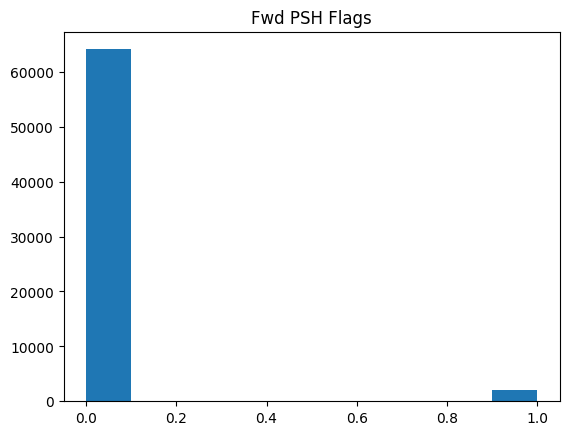

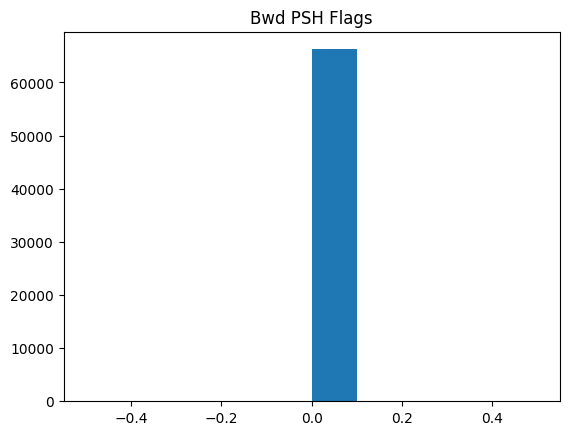

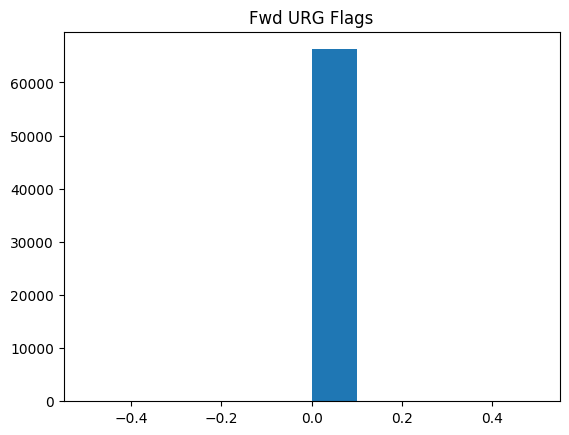

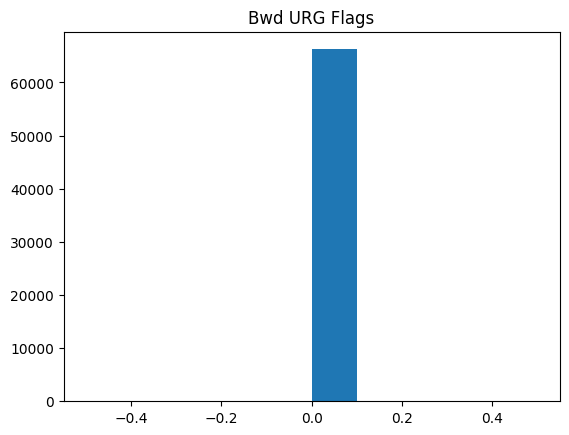

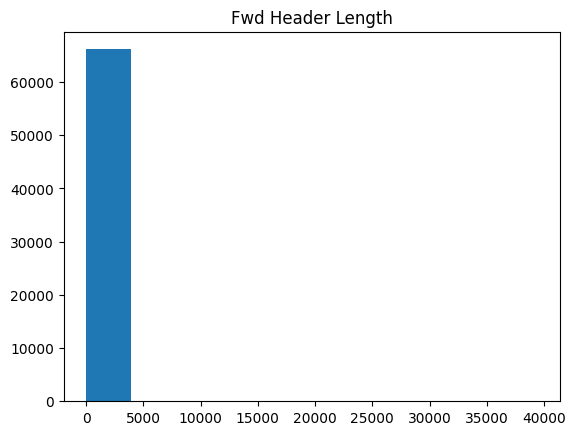

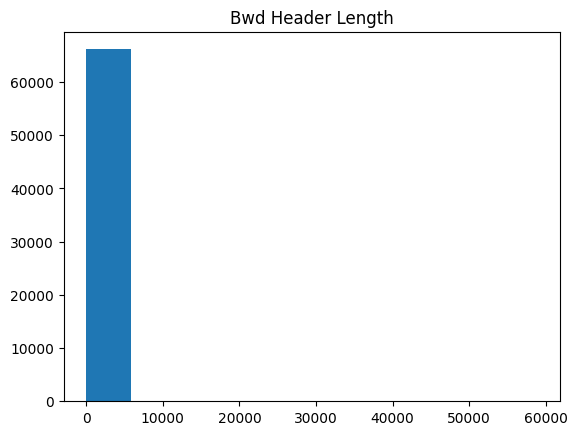

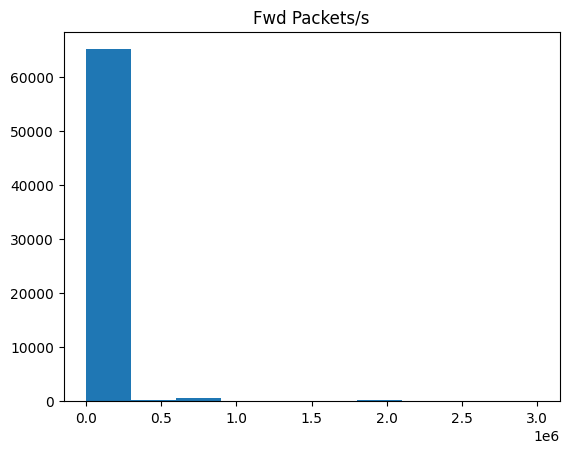

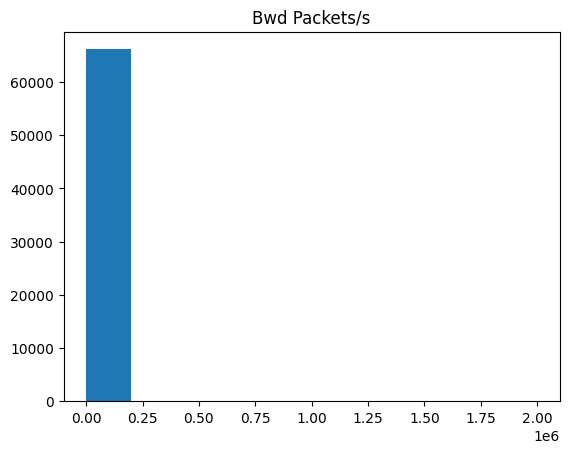

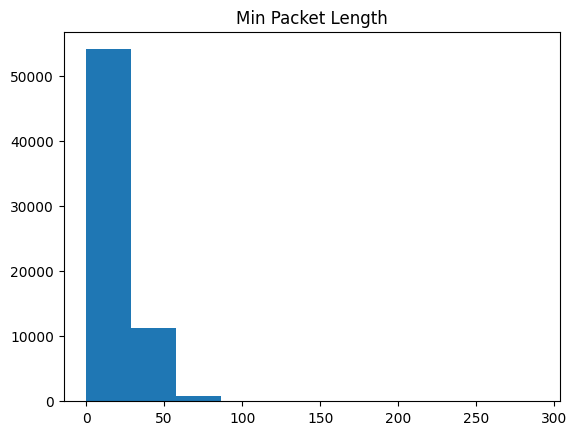

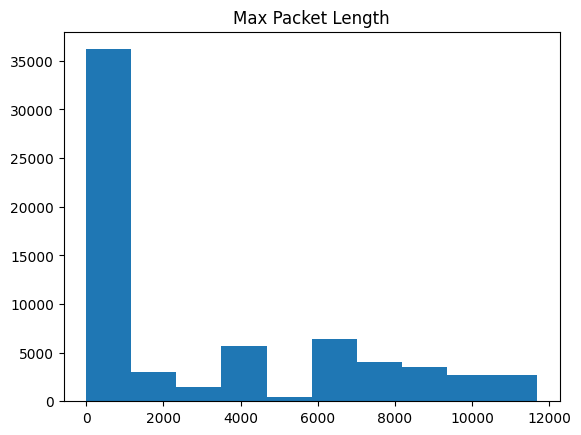

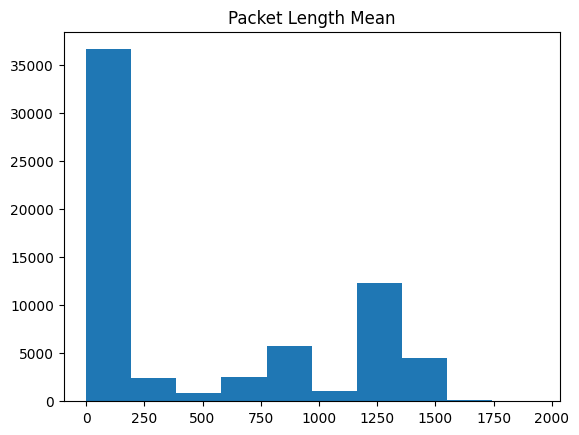

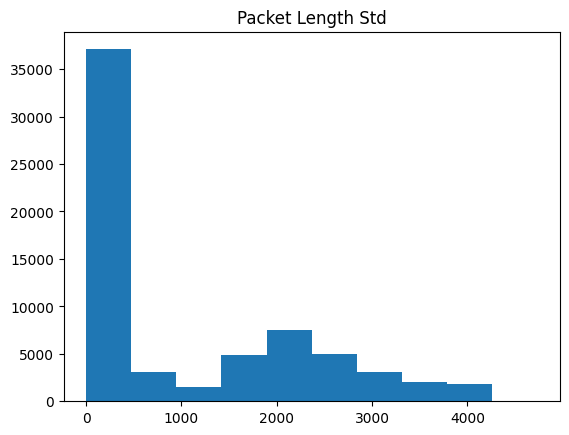

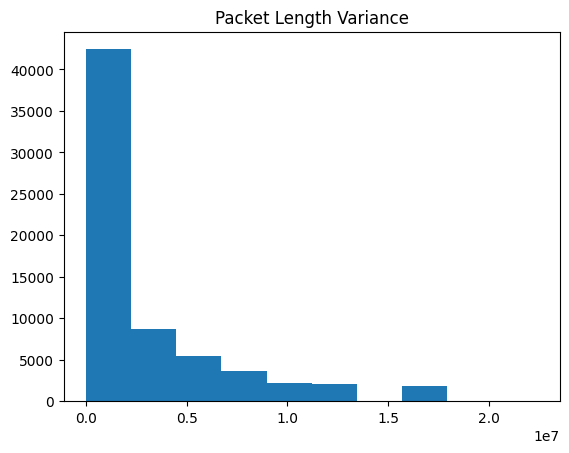

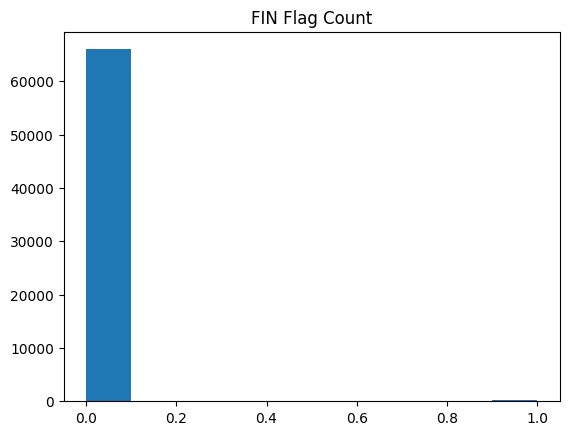

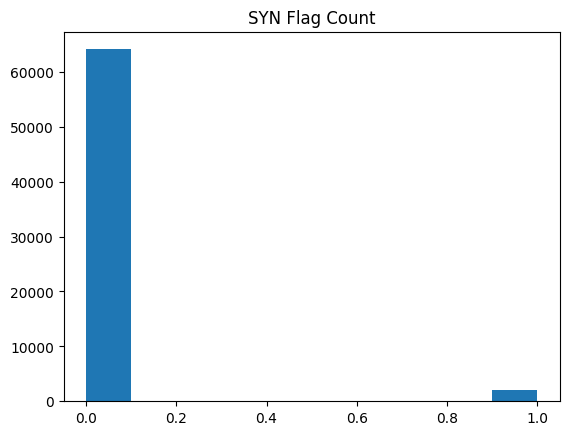

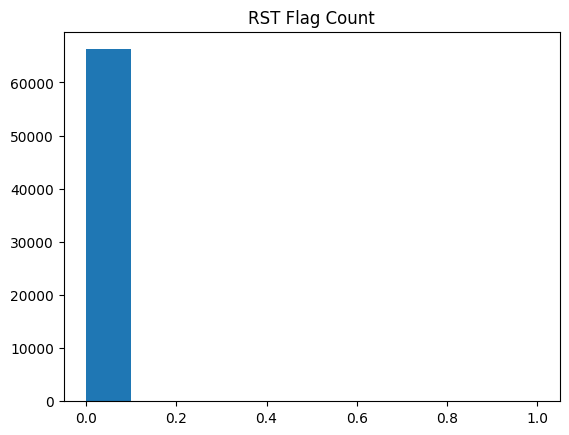

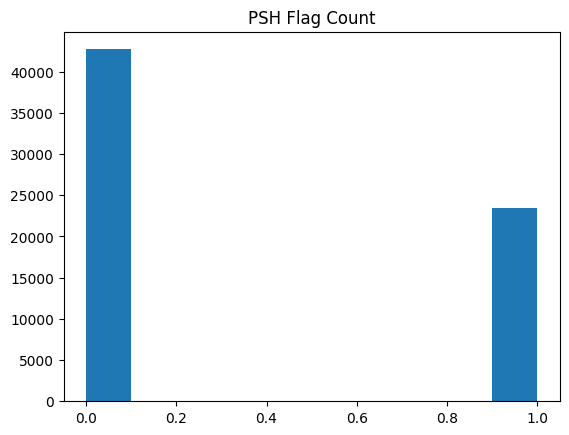

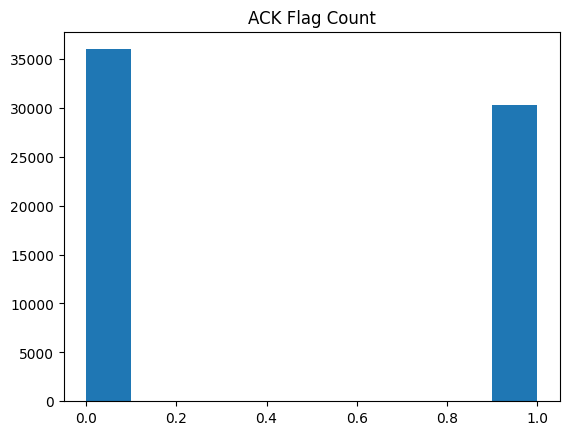

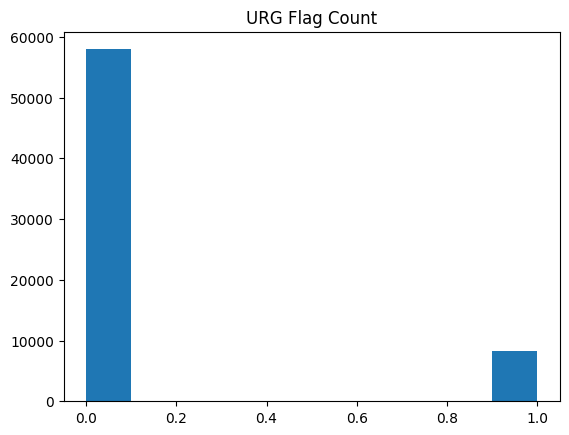

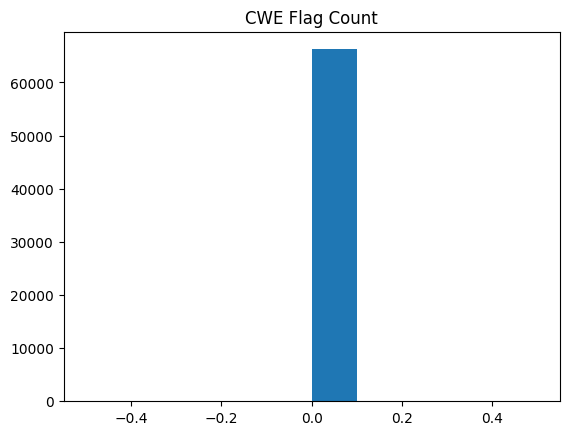

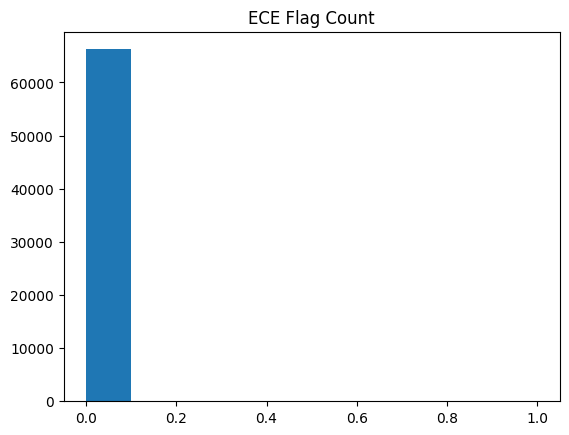

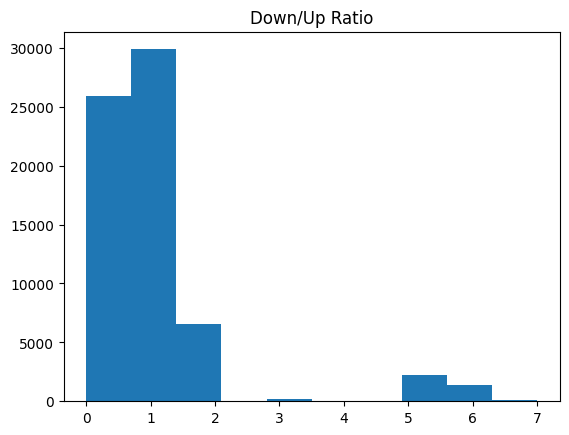

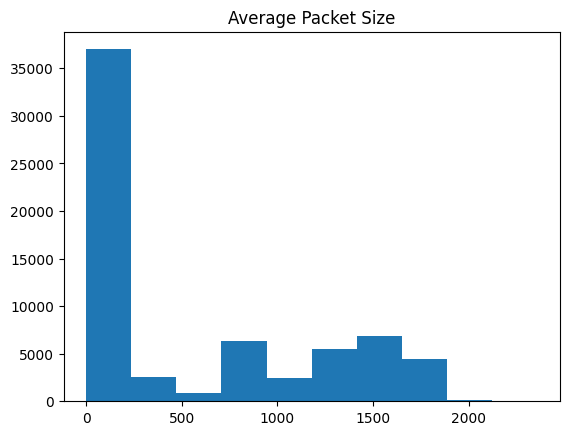

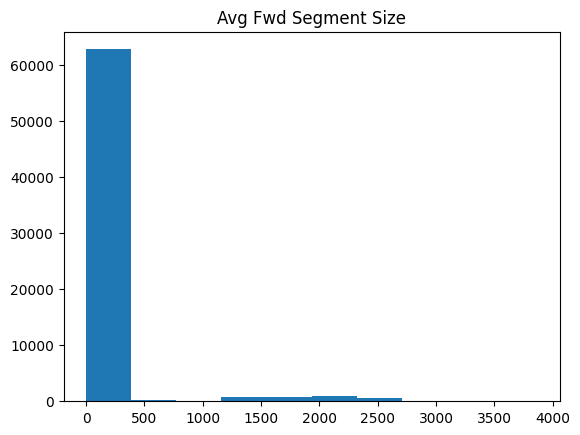

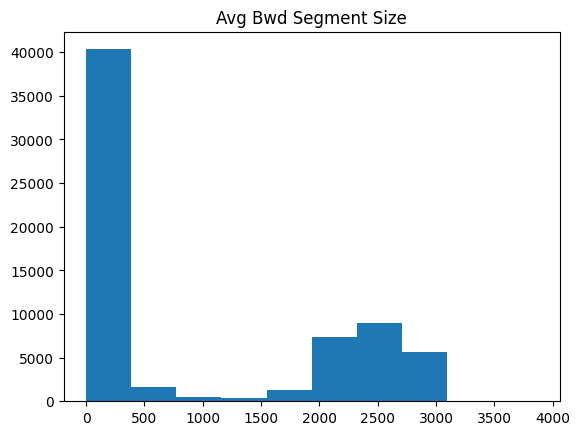

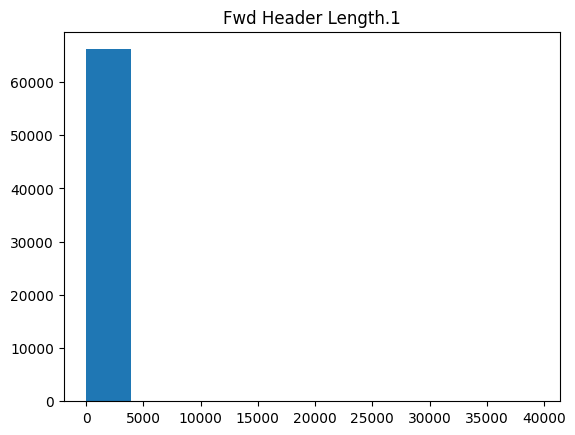

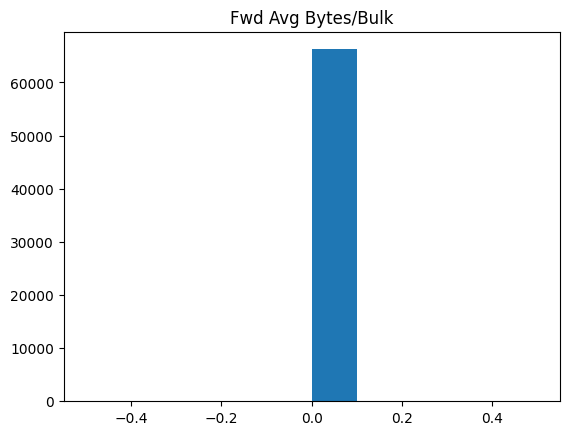

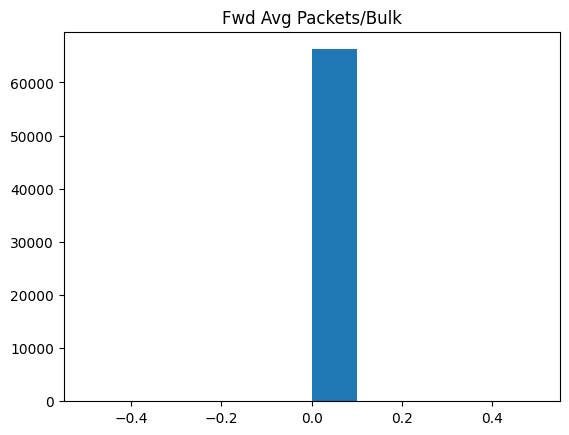

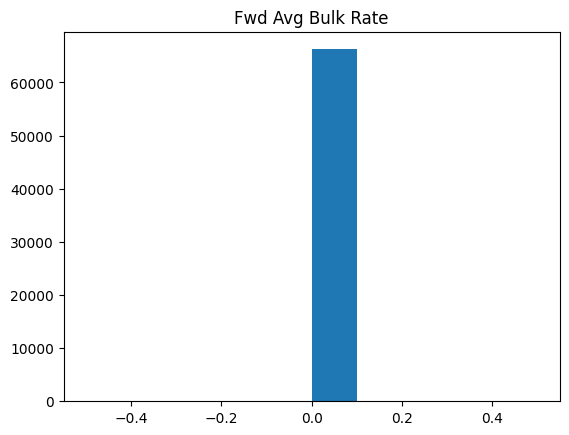

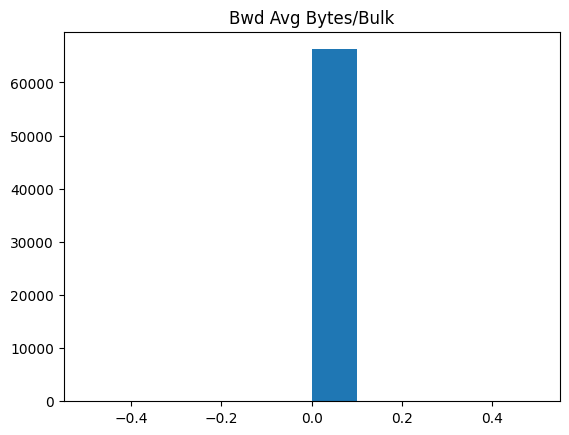

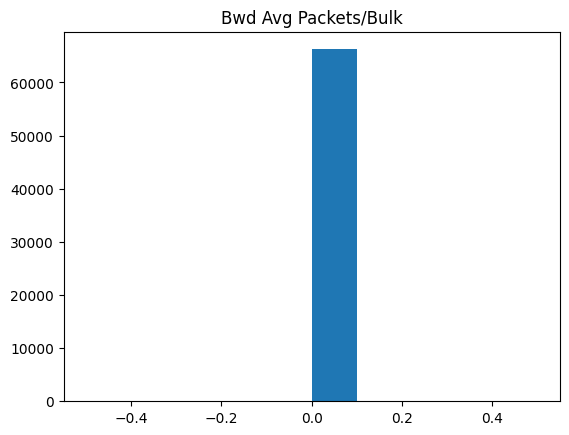

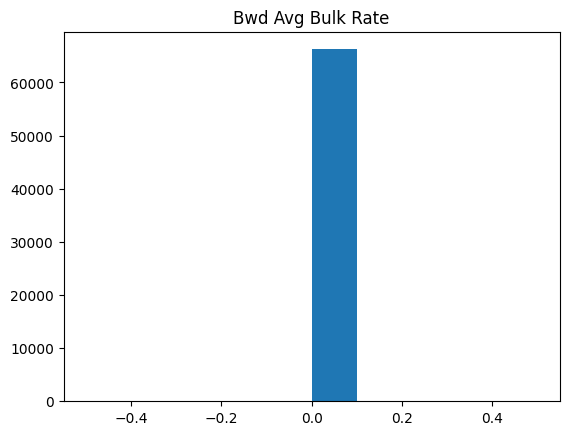

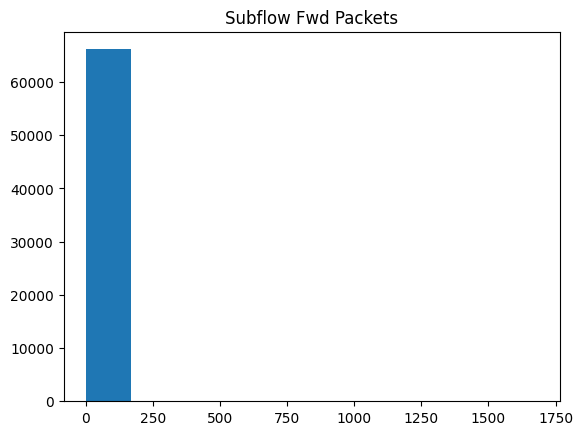

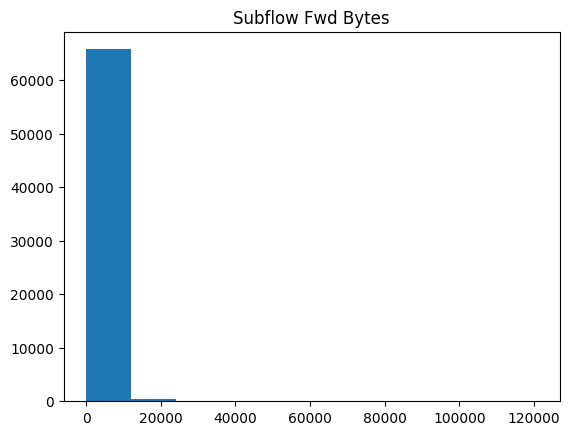

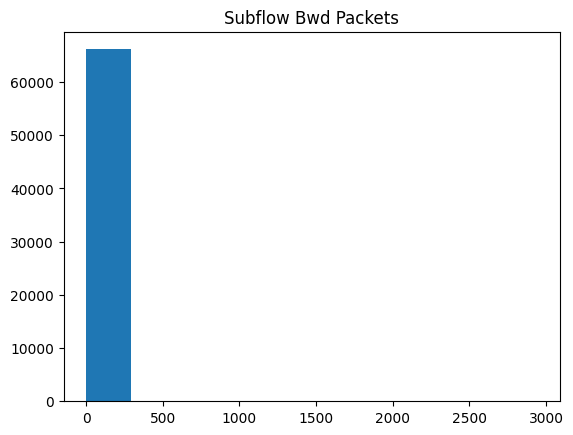

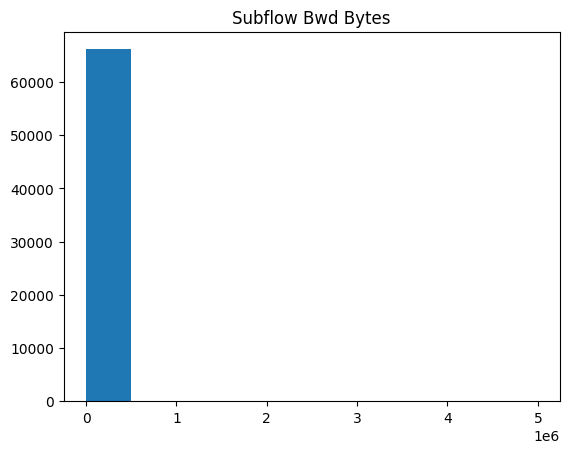

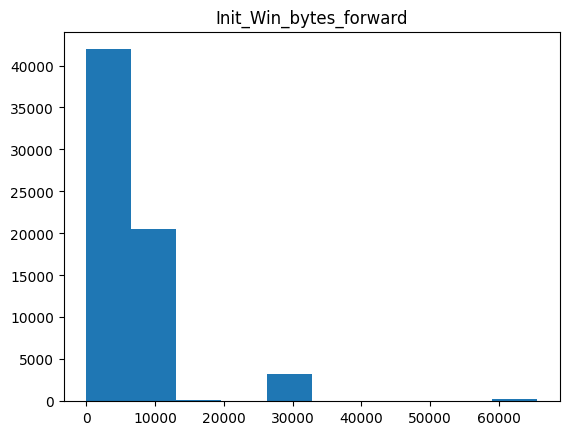

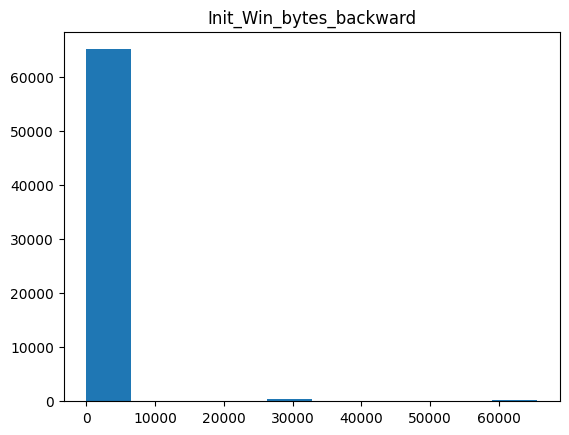

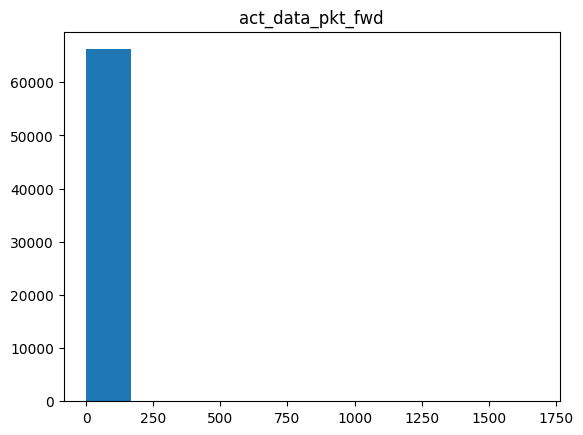

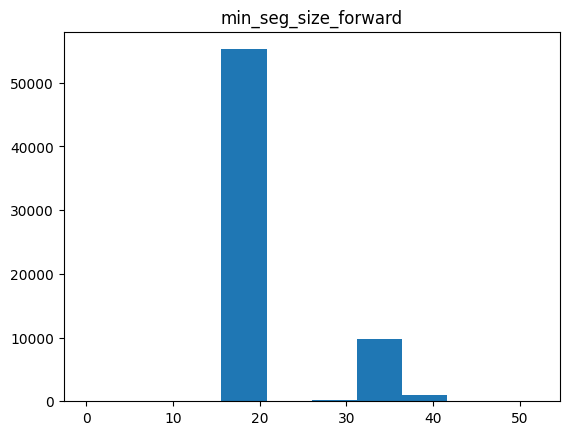

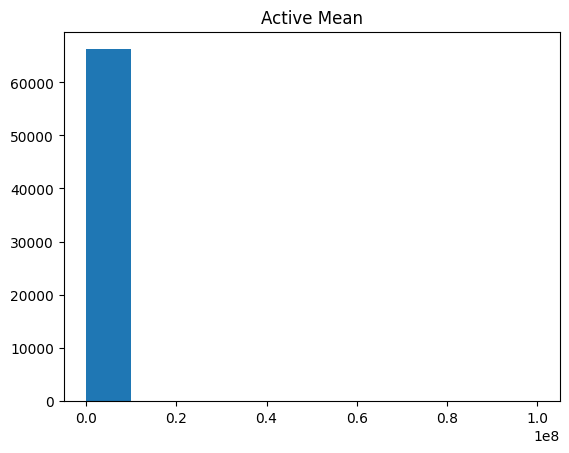

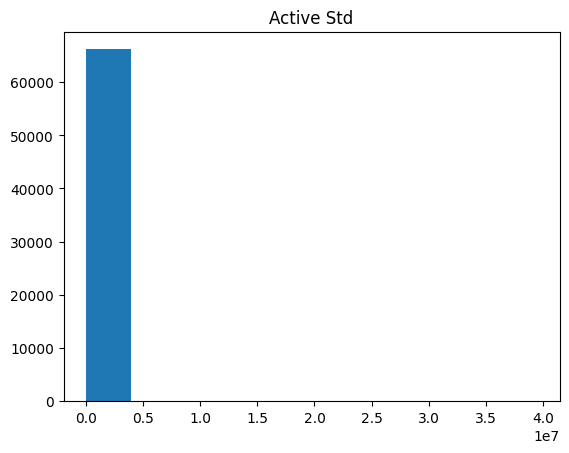

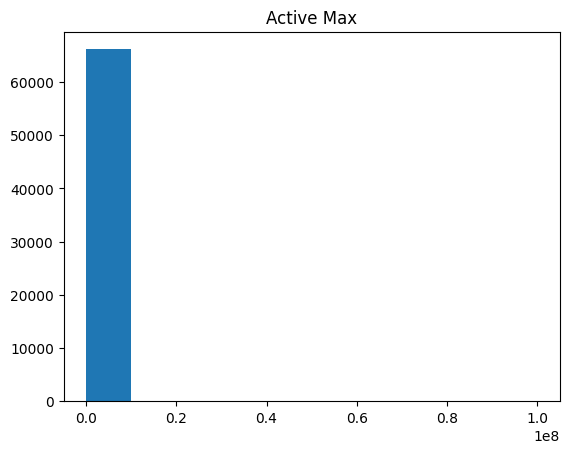

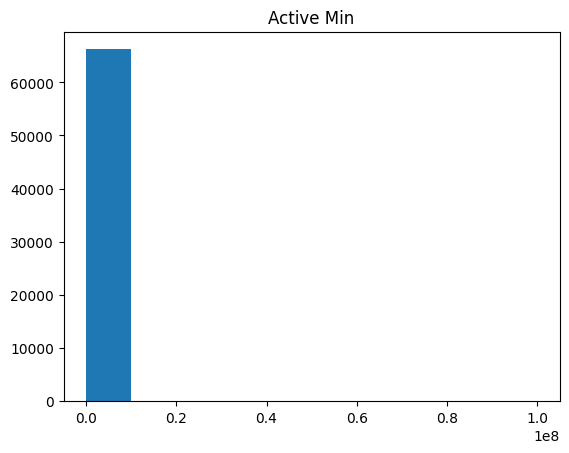

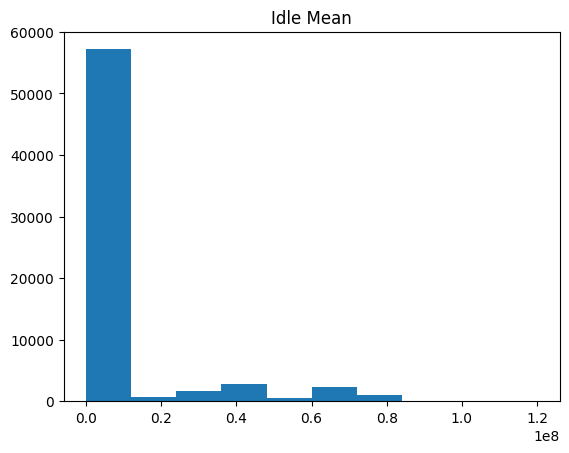

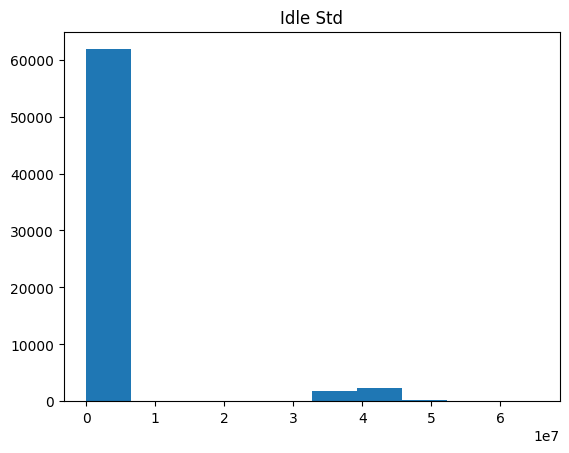

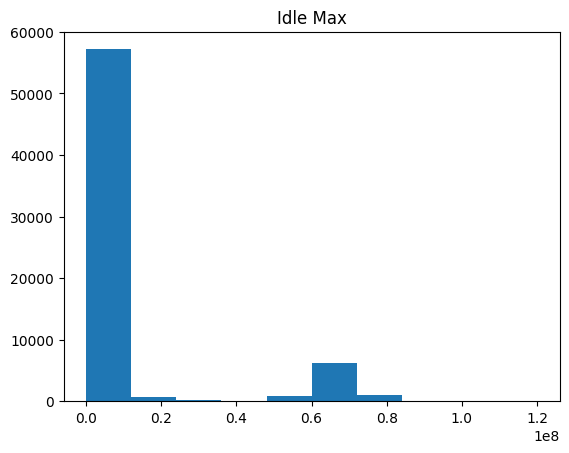

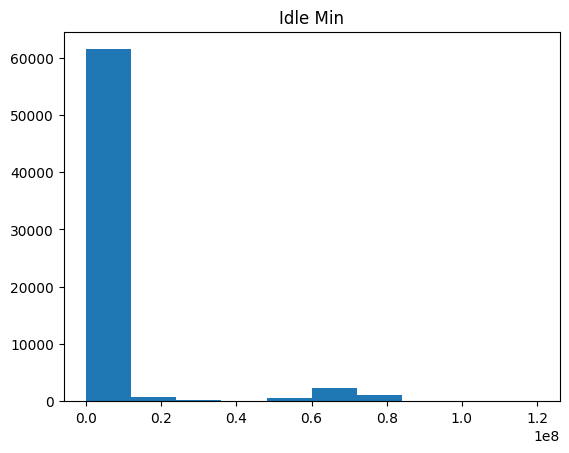

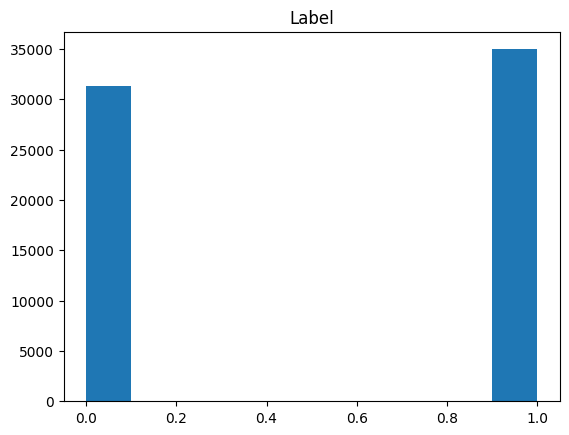

In [28]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

In [29]:
# Convert into numpy array

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])

In [30]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


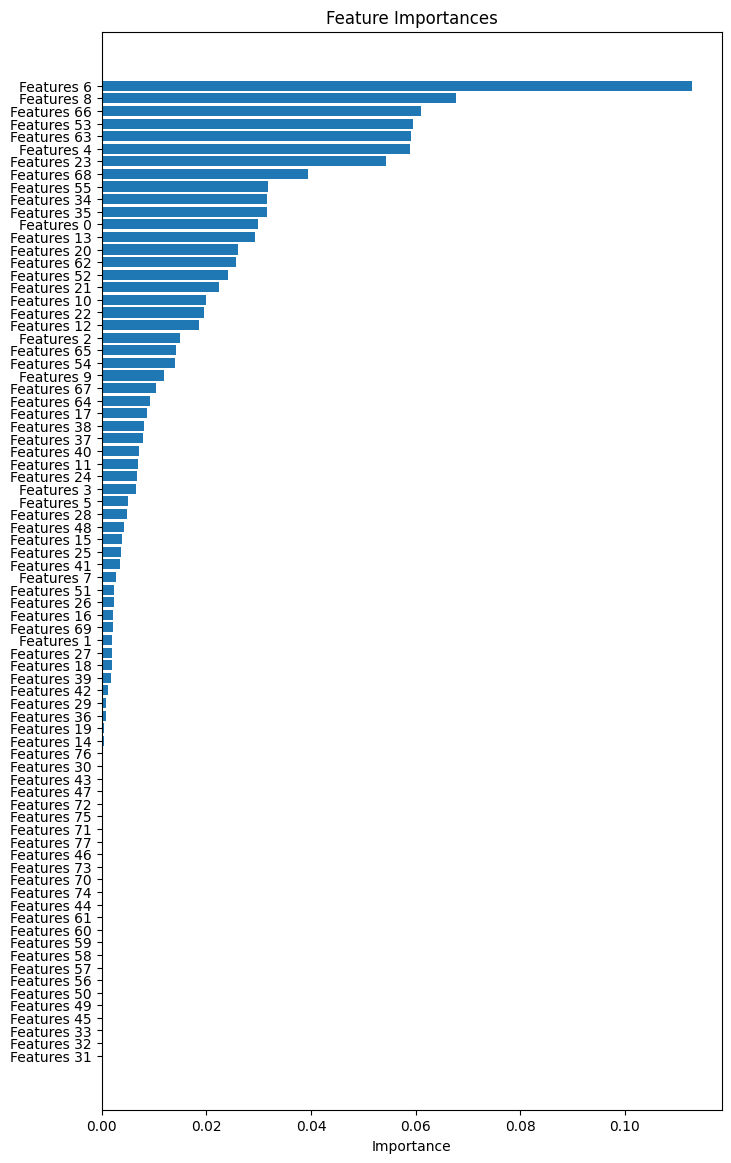

In [31]:

from sklearn.ensemble import RandomForestClassifier  

# Assuming X_train and y_train are your training data and labels  
rf_model = RandomForestClassifier()  # Create the model instance  

# Fit the model using the training data  
rf_model.fit(X_train, y_train)  

# Now you can retrieve the feature importances  
importances = rf_model.feature_importances_  

# Getting the indices of features sorted by importance  
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)  
feature_names = [f"Features {i}" for i in indices]  # Replace with your actual column names  

# Plotting feature importances horizontally  
import matplotlib.pyplot as plt  # Make sure to import matplotlib if not already imported  

plt.figure(figsize=(8, 14))  
plt.barh(range(X_train.shape[1]), importances[indices], align="center")  
plt.yticks(range(X_train.shape[1]), feature_names)  
plt.xlabel("Importance")  
plt.title("Feature Importances")  
plt.show()

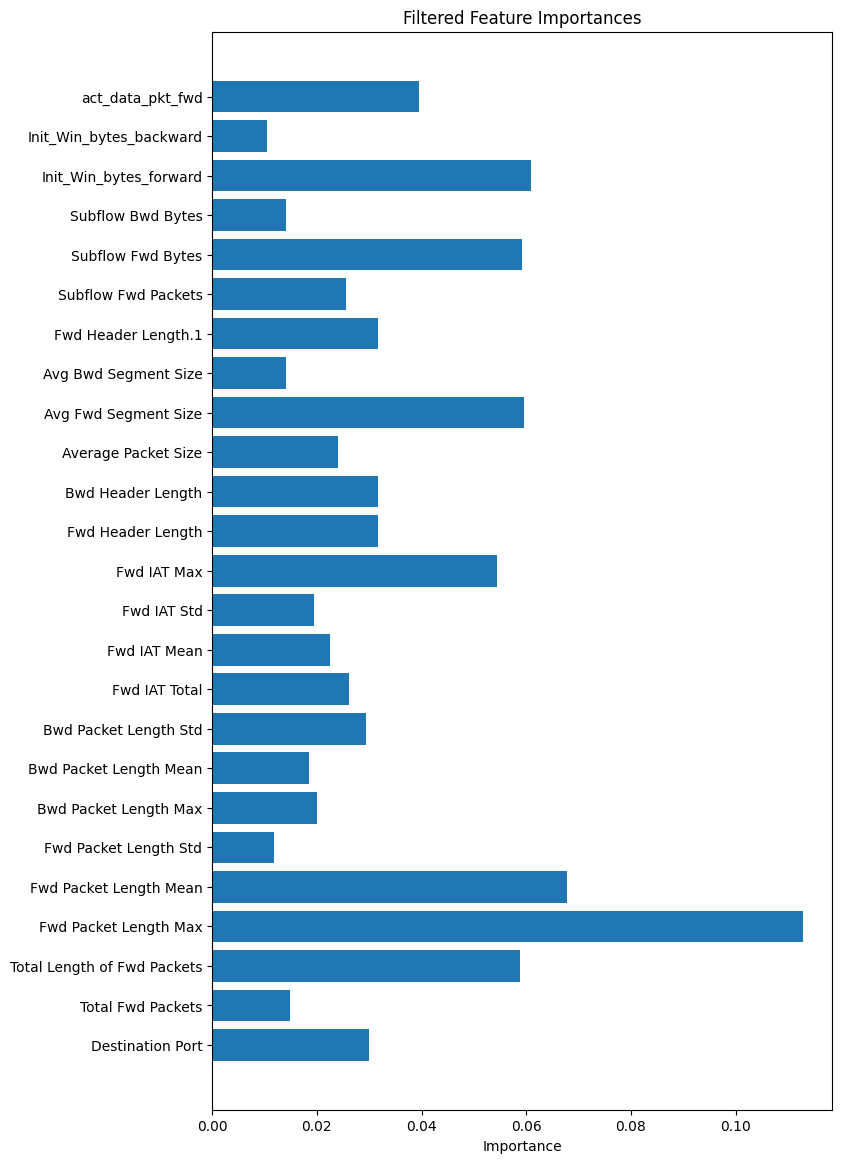

In [32]:
# Set a threshold for feature importance  
threshold = 0.01  # Adjust this value based on your needs  

# Get the indices of features that meet the threshold  
important_indices = [i for i in range(len(importances)) if importances[i] > threshold]  

# Get the column names of the important features  
important_feature_names = [X_train.columns[i] for i in important_indices]  

# Filter the DataFrame to only include the important features  
X_train_filtered = X_train[important_feature_names]  

# Plotting feature importances for the important features  
plt.figure(figsize=(8, 14))  
plt.barh(range(len(important_indices)), importances[important_indices], align="center")  
plt.yticks(range(len(important_indices)), important_feature_names)  
plt.xlabel("Importance")  
plt.title("Filtered Feature Importances")  
plt.show()

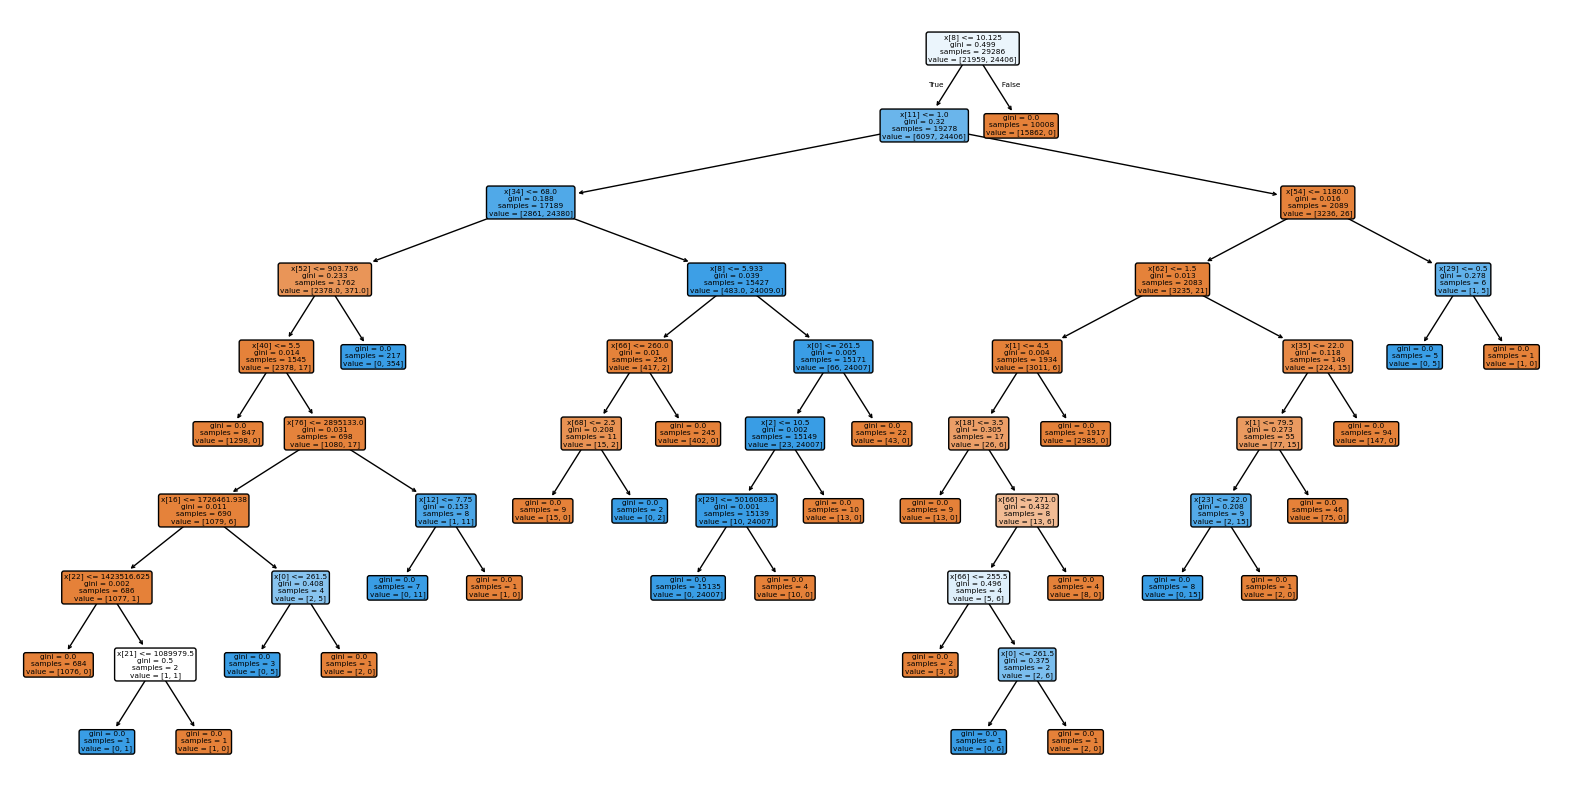

In [33]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [34]:
# Fit the RandomForestClassifier using the filtered training data  
rf_model = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5)  
rf_model.fit(X_train_filtered, y_train)  

# Ensure to filter the test set with the same important features  
X_test_filtered = X_test[important_feature_names]  

# Make predictions with the filtered test set  
rf_pred = rf_model.predict(X_test_filtered)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Function to generate and display a detailed confusion matrix  
def plot_confusion_matrix(y_true, y_pred, classes, title):  
    cm = confusion_matrix(y_true, y_pred)  
    plt.figure(figsize=(8, 6))  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)  
    plt.title(title)  
    plt.xlabel('Predicted')  
    plt.ylabel('True')  
    plt.show()  

# Ensure that rf_pred corresponds to the filtered test set  
# Make predictions using the filtered test set  


In [36]:
rf_pred = rf_model.predict(X_test_filtered)  # Ensure rf_pred is created after filtering  

# Evaluate Random Forest  
rf_accuracy = accuracy_score(y_test, rf_pred)  
rf_f1 = f1_score(y_test, rf_pred, average='weighted')  # average='weighted' for multiclass  
rf_precision = precision_score(y_test, rf_pred, average='weighted')  
rf_recall = recall_score(y_test, rf_pred, average='weighted')  

print('\nRandom Forest Metrics:')  
print(f'Accuracy: {rf_accuracy:.4f}')  
print(f'F1 Score: {rf_f1:.4f}')  
print(f'Precision: {rf_precision:.4f}')  
print(f'Recall: {rf_recall:.4f}')  



Random Forest Metrics:
Accuracy: 0.9993
F1 Score: 0.9993
Precision: 0.9993
Recall: 0.9993


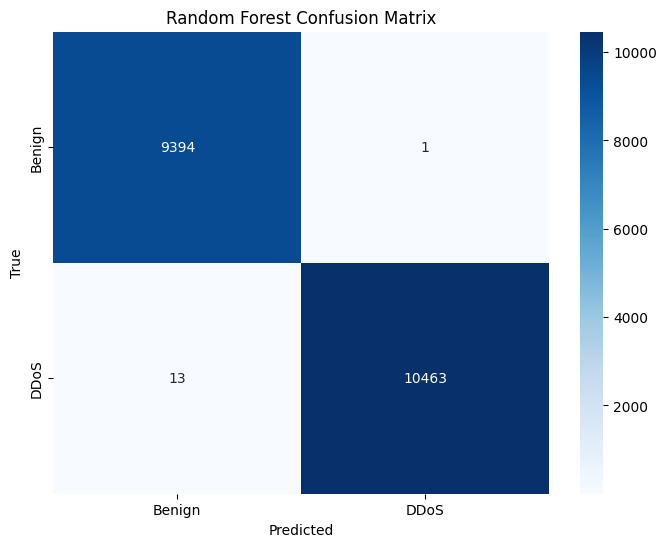

In [37]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [38]:
# Check class distribution in training and test sets  
print("Training set class distribution:")  
print(y_train.value_counts())  

print("\nTest set class distribution:")  
print(y_test.value_counts())

Training set class distribution:
Label
1    24476
0    21889
Name: count, dtype: int64

Test set class distribution:
Label
1    10476
0     9395
Name: count, dtype: int64


In [39]:
from sklearn.metrics import classification_report  

# Show a detailed classification report  
print(classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      9395
     Class 1       1.00      1.00      1.00     10476

    accuracy                           1.00     19871
   macro avg       1.00      1.00      1.00     19871
weighted avg       1.00      1.00      1.00     19871



In [40]:
from sklearn.linear_model import LogisticRegression  

# Set solver to 'liblinear' to support L1 penalty  
lr_model = LogisticRegression(penalty='l2', C=0.5)  
lr_model.fit(X_train_filtered, y_train)  

# Ensure to filter the test set with the same important features  
X_test_filtered = X_test[important_feature_names]  

# Make predictions with the filtered test set  
lr_pred = lr_model.predict(X_test_filtered)  

print(lr_model)

LogisticRegression(C=0.5)


c:\Saifali\SDP\DDOS\DDOS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [42]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')
print(lr_pred)


Logistic Regression Metrics:
Accuracy: 0.9466
F1 Score: 0.9497
Precision: 0.9427
Recall: 0.9568
[1 0 1 ... 1 0 1]


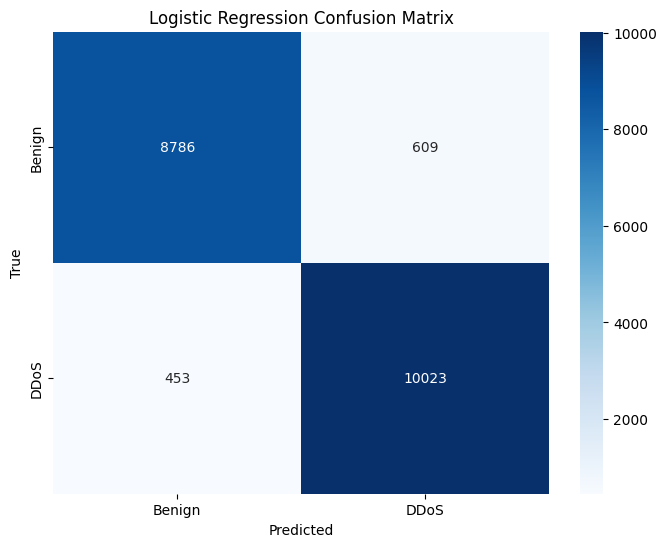

In [43]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

In [44]:
from sklearn.neural_network import MLPClassifier  

# Set alpha to apply L2 regularization (e.g., 0.001)  
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, alpha=0.001, random_state=42)  

# Fit the model to the training data  
nn_model.fit(X_train_filtered, y_train)  

# Make predictions with the filtered test set  
nn_pred = nn_model.predict(X_test_filtered)  # Ensure to filter X_test if necessary

In [45]:

nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9578
F1 Score: 0.9584
Precision: 0.9970
Recall: 0.9227


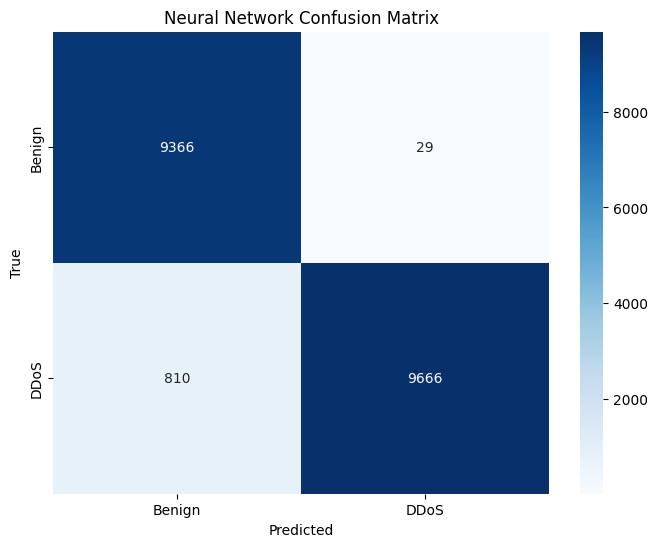

In [46]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

In [47]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test_filtered)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test_filtered)



# Neural Network
nn_proba = nn_model.predict_proba(X_test_filtered)

In [48]:
# Combine predictions for ROC curve



# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

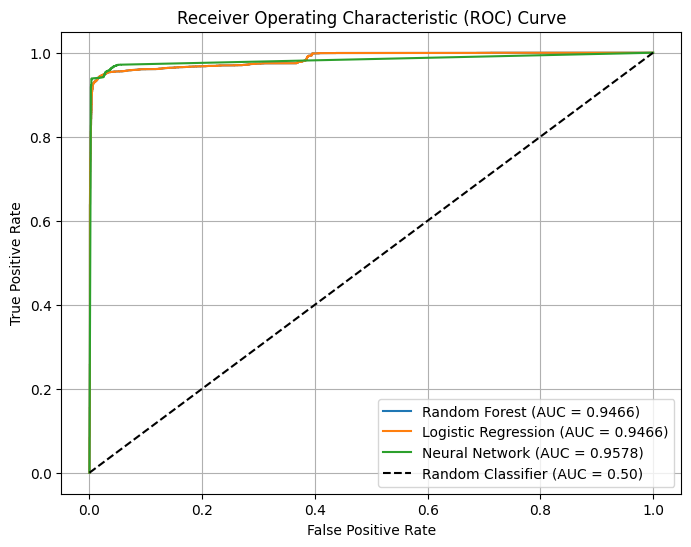

In [53]:
#Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Random Forest (AUC = {lr_accuracy:.4f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_accuracy:.4f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_accuracy:.4f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [50]:
import pickle

# Correctly close the function call with parentheses
with open('ddos_detection_model.pkl', 'wb') as file:
    pickle.dump((rf_auc, lr_auc, nn_auc), file)  # Make sure to close the parentheses
